In [1]:
import tensorflow.keras as tf
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import tensorflow as tf1

In [7]:
import os 
import cv2 

X = [ ]
y = [ ]

y_dict = { 
    
}
SIZE = 124
y_counter = 0
for folder in os.scandir('/content/drive/MyDrive/images') :
  print(folder.path)
  name = folder.path.split('/')[-1]
  image_counter = 0
  
  for image in os.scandir(folder.path):
    image = image.path
    if image_counter == 100 :
      break
    if image is not None :
      img = cv2.imread(image)
      if img is not None :
        img = cv2.resize(img,(SIZE, SIZE))
        X.append(img)
        image_counter += 1
        y.append(y_counter)
  y_dict[name] = y_counter
  y_counter += 1



/content/drive/MyDrive/images/lebron_james
/content/drive/MyDrive/images/lionel_messi
/content/drive/MyDrive/images/sachin_ramesh_tendulkar
/content/drive/MyDrive/images/virat_kohli
/content/drive/MyDrive/images/cristiano_ronaldo
/content/drive/MyDrive/images/neymar_jr


In [11]:
X = np.array(X)

In [12]:
y = np.array(y)

In [50]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [15]:
print(f"Number of Training data :{len(x_train)}")
print(f"Number of Testing data :{len(x_test)}")

Number of Training data :450
Number of Testing data :150


In [16]:
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

In [36]:
## Creating a Deep Neural Network 
model = tf.Sequential(
    
)

model.add(tf.layers.Conv2D(kernel_size = (5, 5), activation = 'relu', input_shape = (124, 124, 3), padding = 'same', filters = 10))
model.add(tf.layers.BatchNormalization())
model.add(tf.layers.MaxPooling2D(pool_size = (3, 3)))
model.add(tf.layers.Dropout(rate = 0.4))
model.add(tf.layers.Conv2D(kernel_size = (5, 5), activation = 'relu', input_shape = (124, 124, 3), padding = 'same' , filters = 10))
model.add(tf.layers.BatchNormalization())
model.add(tf.layers.MaxPooling2D(pool_size = (3, 3)))
model.add(tf.layers.Flatten())

In [37]:
# Returns the ouput from the sequential deep model

model.output

<KerasTensor: shape=(None, 1690) dtype=float32 (created by layer 'flatten_1')>

In [27]:
## The above architecture will be common for both the cnn and as well as a cnn with ml

In [38]:
# Creating a Dense Layer
Dense_layer = model.output
Dense_layer = tf.layers.Dense(100, activation = 'relu', kernel_initializer = 'he_uniform')(Dense_layer)
output_layer = tf.layers.Dense(6, activation = 'softmax')(Dense_layer)

In [39]:
# model.input gives the input shape or input layer of the sequential model
cnn_model = tf.Model(inputs = model.input, outputs = output_layer)
cnn_model.compile(loss = 'categorical_crossentropy', metrics = 'accuracy', optimizer = 'adam')

In [31]:
cnn_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense_2 (Dense)             (None, 6)                 606       
                                                                 
Total params: 606
Trainable params: 606
Non-trainable params: 0
_________________________________________________________________


In [40]:
history = cnn_model.fit(x_train, y_train, epochs = 50, validation_data = (x_test, y_test))

Epoch 1/50
15/15 [==============================] - 9s 539ms/step - loss: 3.3032 - accuracy: 0.2489 - val_loss: 5.1137 - val_accuracy: 0.2800
Epoch 2/50
15/15 [==============================] - 7s 496ms/step - loss: 1.6007 - accuracy: 0.4267 - val_loss: 2.9890 - val_accuracy: 0.2800
Epoch 3/50
15/15 [==============================] - 7s 498ms/step - loss: 1.3032 - accuracy: 0.5156 - val_loss: 4.0968 - val_accuracy: 0.2400
Epoch 4/50
15/15 [==============================] - 7s 492ms/step - loss: 1.1545 - accuracy: 0.5911 - val_loss: 2.1435 - val_accuracy: 0.4200
Epoch 5/50
15/15 [==============================] - 7s 490ms/step - loss: 0.9637 - accuracy: 0.6689 - val_loss: 2.4704 - val_accuracy: 0.3467
Epoch 6/50
15/15 [==============================] - 7s 488ms/step - loss: 0.8100 - accuracy: 0.7356 - val_loss: 2.1643 - val_accuracy: 0.4067
Epoch 7/50
15/15 [==============================] - 7s 491ms/step - loss: 0.6778 - accuracy: 0.7533 - val_loss: 2.0617 - val_accuracy: 0.4200
Epoch 

In [41]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

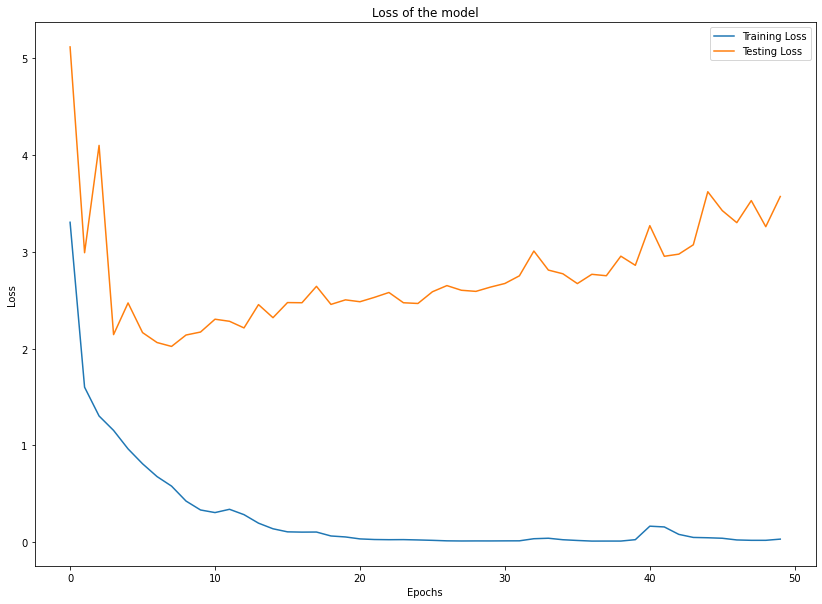

In [42]:
plt.figure(figsize = (14, 10))
Epochs = range(1, 51)
plt.plot(train_loss, label = 'Training Loss')
plt.plot(val_loss, label = "Testing Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss of the model')
plt.legend()
plt.show()

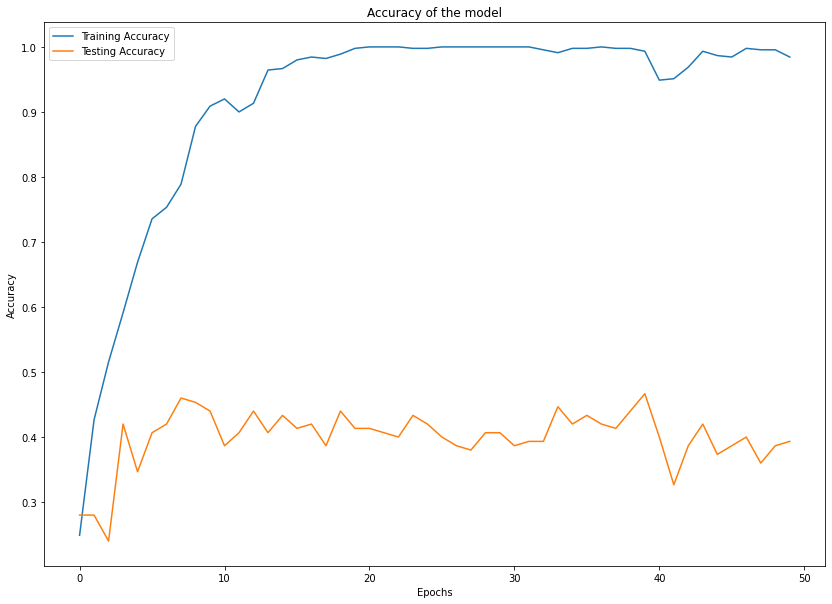

In [43]:
plt.figure(figsize = (14, 10))
Epochs = range(1, 51)
plt.plot(train_acc, label = 'Training Accuracy')
plt.plot(val_acc, label = "Testing Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy of the model')
plt.legend()
plt.show()

In [44]:
## Using a Random Forest with CN

In [51]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train, y_test = le.fit_transform(y_train), le.fit_transform(y_test)

In [45]:
xtrain_for_RF = model.predict(x_train) 
xtest_for_RF = model.predict(x_test)

In [48]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 35, random_state = 42)

In [52]:
rf.fit(xtrain_for_RF, y_train)

RandomForestClassifier(n_estimators=35, random_state=42)

In [54]:
y_pred = rf.predict(xtest_for_RF)

In [55]:
y_pred

array([1, 2, 1, 0, 1, 3, 5, 4, 0, 3, 0, 1, 5, 1, 2, 2, 2, 5, 1, 5, 0, 5,
       3, 5, 5, 3, 0, 2, 5, 3, 5, 1, 0, 2, 2, 1, 2, 2, 4, 2, 2, 0, 1, 5,
       4, 3, 1, 0, 0, 4, 3, 4, 1, 5, 0, 3, 2, 1, 4, 2, 2, 1, 3, 3, 1, 4,
       1, 1, 5, 2, 3, 0, 1, 2, 0, 4, 5, 1, 2, 4, 3, 4, 0, 5, 0, 0, 2, 1,
       3, 1, 5, 5, 0, 3, 2, 2, 2, 0, 4, 5, 5, 2, 0, 3, 0, 0, 2, 2, 2, 4,
       4, 4, 2, 1, 5, 5, 2, 4, 4, 0, 2, 0, 4, 1, 4, 1, 2, 2, 2, 2, 0, 0,
       1, 1, 2, 4, 0, 4, 3, 3, 0, 2, 3, 4, 2, 1, 1, 4, 0, 0])

In [57]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [58]:
confusion_matrix(y_test, y_pred)

array([[20,  0,  2,  1,  4,  5],
       [ 1, 12,  7,  2,  5,  1],
       [ 0,  3, 12,  4,  1,  2],
       [ 0,  1,  5,  7,  1,  5],
       [ 3,  3,  4,  1, 10,  0],
       [ 4,  8,  5,  3,  1,  7]])

In [59]:
accuracy_score(y_test, y_pred)

0.4533333333333333